## 모듈 불러오기

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## 데이터 가져오기 및 테스트 셋 분리

In [2]:
data = load_diabetes()

n_features = len(data.feature_names)
df_X = data.data
df_y = data.target

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

## 손실함수 정의

In [3]:
def MSE(y_pred, y):
  mse = ((y_pred - y) ** 2).mean()
  return mse

def loss(y_pred, y):
  return MSE(y_pred, y)

## 선형회귀 모델 정의

In [4]:
class LinearModel:
  def __init__(self, n_features):
    self.W = np.random.rand(n_features)
    self.b = np.random.rand()
    self.n_weights = n_features

  def gradient(self, X, y):
      # 데이터 수
      N = len(y)

      y_pred = self.predict(X)
      dw = (1 / N) * 2 * X.T.dot(y_pred - y)
      db = (1 / N) * 2 * (y_pred - y).sum()

      return dw, db

  def fit(self, X, y, learning_rate):
    # 가중치 업데이트
    dW, db = self.gradient(X, y)
    self.W -= learning_rate * dW
    self.b -= learning_rate * db

    # loss값 계산
    y_pred = self.predict(X)
    L = loss(y_pred, y)
    return L

  def predict(self, X):
    return X.dot(self.W) + self.b

## 훈련

In [5]:
lr = LinearModel(n_features)

learning_rate = 0.1
losses = []

for i in range(1, 3001):
  lr_loss = lr.fit(X_train, y_train, learning_rate)
  losses.append(lr_loss)
  if i % 100 == 0:
      print('Iteration %d : Loss %0.4f' % (i, lr_loss))

Iteration 100 : Loss 5381.8843
Iteration 200 : Loss 4879.0338
Iteration 300 : Loss 4505.1279
Iteration 400 : Loss 4223.4054
Iteration 500 : Loss 4008.0051
Iteration 600 : Loss 3840.6891
Iteration 700 : Loss 3708.5560
Iteration 800 : Loss 3602.4445
Iteration 900 : Loss 3515.8179
Iteration 1000 : Loss 3443.9848
Iteration 1100 : Loss 3383.5543
Iteration 1200 : Loss 3332.0544
Iteration 1300 : Loss 3287.6648
Iteration 1400 : Loss 3249.0294
Iteration 1500 : Loss 3215.1247
Iteration 1600 : Loss 3185.1668
Iteration 1700 : Loss 3158.5461
Iteration 1800 : Loss 3134.7810
Iteration 1900 : Loss 3113.4844
Iteration 2000 : Loss 3094.3407
Iteration 2100 : Loss 3077.0884
Iteration 2200 : Loss 3061.5080
Iteration 2300 : Loss 3047.4129
Iteration 2400 : Loss 3034.6425
Iteration 2500 : Loss 3023.0580
Iteration 2600 : Loss 3012.5376
Iteration 2700 : Loss 3002.9745
Iteration 2800 : Loss 2994.2740
Iteration 2900 : Loss 2986.3521
Iteration 3000 : Loss 2979.1338


# 테스트 셋 mse

In [6]:
prediction = lr.predict(X_test)
mse = loss(prediction, y_test)
mse

2870.309505727748

# 예측 시각화

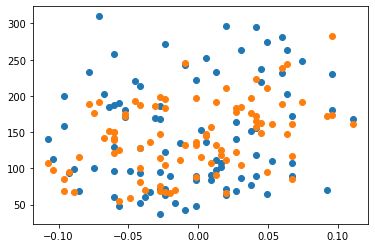

In [7]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()